<a href="https://colab.research.google.com/github/alamincse6615/ml/blob/master/Predict_CKD_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This program classifies patients having CKD or not
# Using Artificial Neural Networks (ANN)

# New Section

In [ ]:
#Import liraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

import seaborn as sns

import tempfile
import os
import json
import tensorflow as tf

import warnings
import pickle



In [ ]:
#Load the data
from google.colab import files
upload = files.upload()

df = pd.read_csv('kidney_disease.csv')

#print the 5 rows of data frame(df)
df.head()

Saving kidney_disease.csv to kidney_disease (1).csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#Get the shapeof the data(get the no of rows and columns)
df.shape

(400, 26)

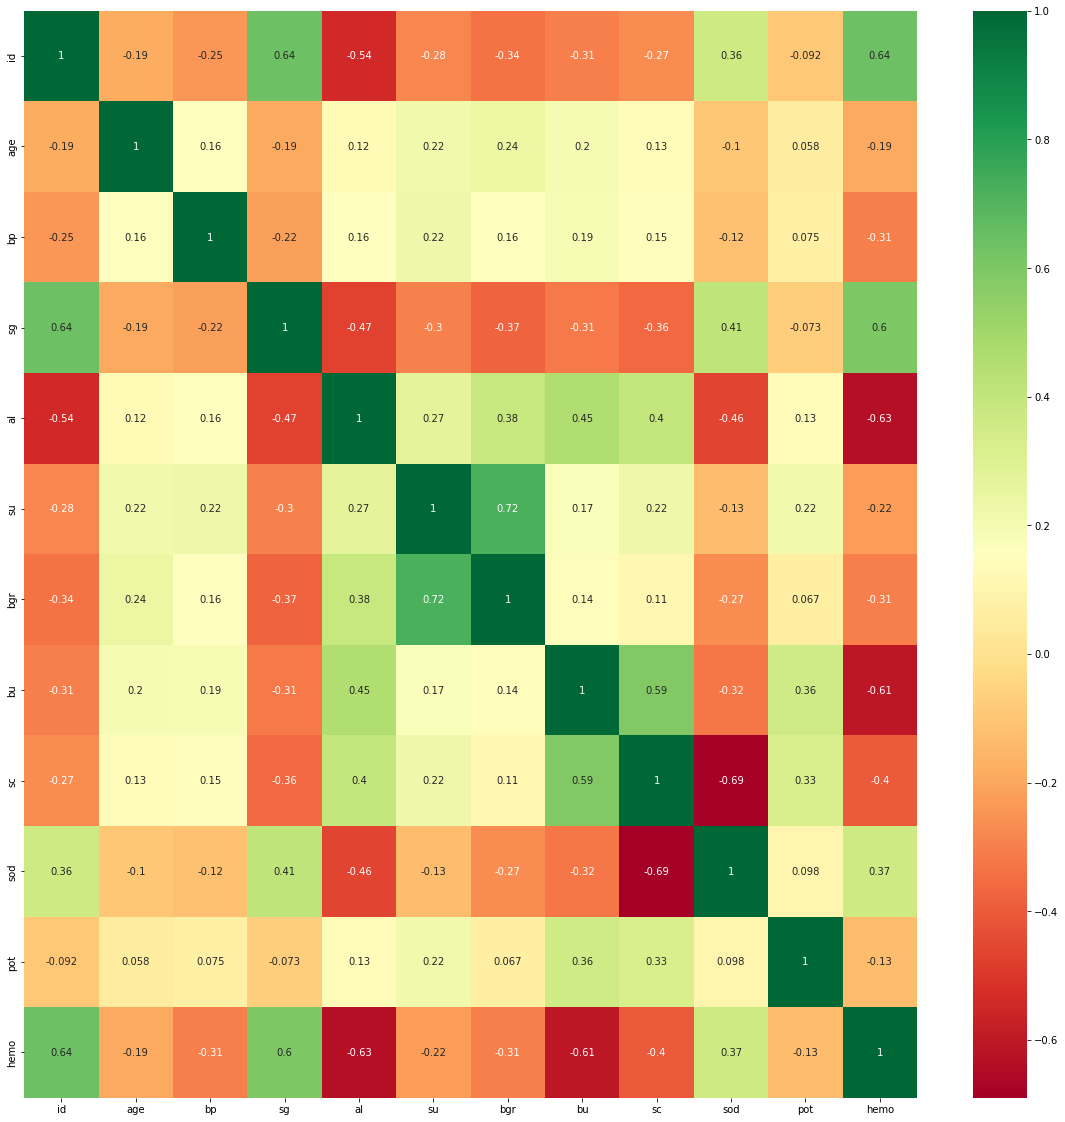

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Create a list of column names to keep
columns_to_retain = ['age', 'bp', 'sg','al', 'su', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification'] # try 1
#columns_to_retain = ['bp', 'sg', 'su', 'sc', 'htn', 'dm', 'classification'] # try 2

#Drop the columns thar are not in columns_to_retain
df = df.drop( [col for col in df.columns if not col in columns_to_retain], axis=1 )

#Drop the rows with na or missing values
df = df.dropna(axis=0)

In [ ]:
df.shape

(276, 10)

In [ ]:
#Transform the non-numeric data in the columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform( df[column] )

<ipython-input-7-bdc58c2c5612>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-7-bdc58c2c5612>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-7-bdc58c2c5612>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


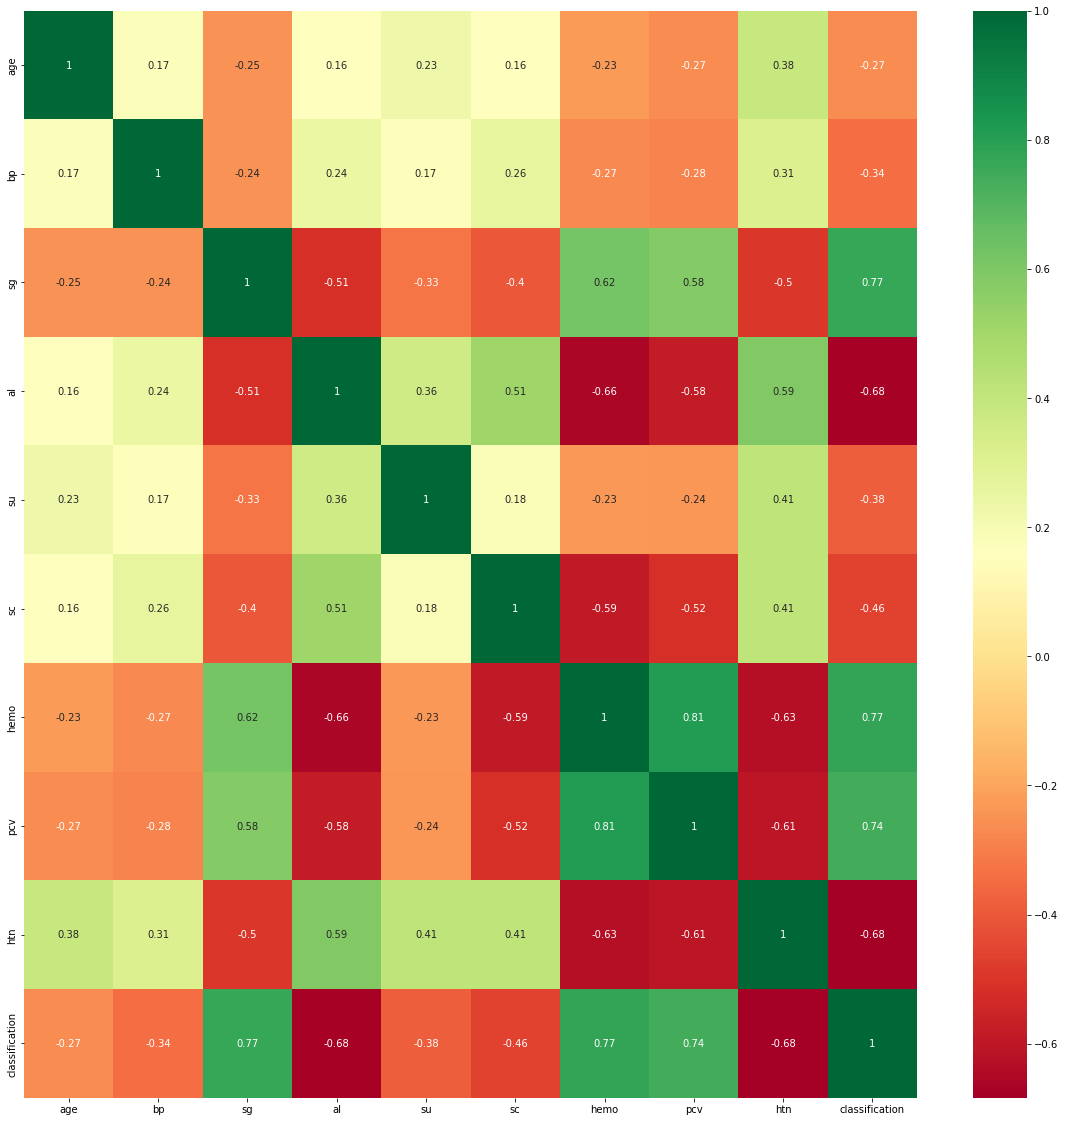

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Print the first 5 rows of the new cleaned data set
df.head(100)

,age,bp,sg,al,su,sc,hemo,pcv,htn,classification
0,48.0,80.0,1.020,1.0,0.0,1.2,15.4,27,1,0
1,7.0,50.0,1.020,4.0,0.0,0.8,11.3,21,0,0
2,62.0,80.0,1.010,2.0,3.0,1.8,9.6,14,0,0
3,48.0,70.0,1.005,4.0,0.0,3.8,11.2,15,1,0
4,51.0,80.0,1.010,2.0,0.0,1.4,11.6,18,0,0
...,...,...,...,...,...,...,...,...,...,...
158,71.0,60.0,1.020,3.0,2.0,1.5,10.9,14,1,0
159,59.0,80.0,1.010,1.0,0.0,1.3,10.4,18,0,0
163,46.0,80.0,1.010,0.0,0.0,2.0,9.0,10,1,0
167,34.0,70.0,1.020,0.0,0.0,0.9,12.7,25,0,0


In [ ]:
#Split the data into independent (X) data set (the features) and dependent (Y) data set (the target)
X = df.drop(['classification'], axis=1)
Y = df['classification']

In [ ]:
#Feature scaling
#min-max scalar method scales the data set so that all the input featires lie between 0 and 1
x_scalar = MinMaxScaler()
x_scalar.fit(X)
column_names = X.columns
X[column_names] = x_scalar.transform(X)

In [ ]:
#Split the data in to 80% training and 20% testing & shuffle
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True)

In [ ]:
#Build the model using a sequential model
model = Sequential()
model.add(Dense(7, input_dim = len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(1, activation='hard_sigmoid'))

In [ ]:
#Compile the model. binary_crossentropy is function use to two classes(yes or no like things)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train the model
history = model.fit(X_train, Y_train, epochs=250, batch_size=X_train.shape[0])

Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 0.6907 - accuracy: 0.4591
Epoch 2/250
1/1 [==============================] - 0s 11ms/step - loss: 0.6894 - accuracy: 0.4591
Epoch 3/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6880 - accuracy: 0.4636
Epoch 4/250
1/1 [==============================] - 0s 17ms/step - loss: 0.6867 - accuracy: 0.4636
Epoch 5/250
1/1 [==============================] - 0s 12ms/step - loss: 0.6853 - accuracy: 0.4636
Epoch 6/250
1/1 [==============================] - 0s 12ms/step - loss: 0.6839 - accuracy: 0.4636
Epoch 7/250
1/1 [==============================] - 0s 13ms/step - loss: 0.6824 - accuracy: 0.4636
Epoch 8/250
1/1 [==============================] - 0s 14ms/step - loss: 0.6810 - accuracy: 0.4727
Epoch 9/250
1/1 [==============================] - 0s 14ms/step - loss: 0.6797 - accuracy: 0.4818
Epoch 10/250
1/1 [==============================] - 0s 11ms/step - loss: 0.6783 - accuracy: 0.4818
Epoch 11/250
1/1 [===

In [ ]:
#Save the model
model.save('skd.model')

Text(0.5, 0, 'epoch')

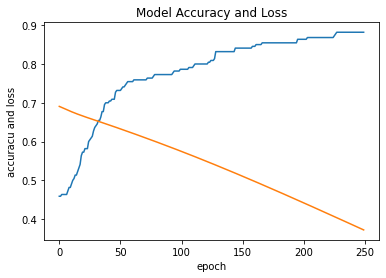

In [ ]:
#Visualize the mdoel loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('accuracu and loss')
plt.xlabel('epoch')

In [ ]:
#get the shape of the training and testing data set
print('shape of training data: ',X_train.shape)
print('shape of testing data: ',X_test.shape)

shape of training data:  (220, 9)
shape of testing data:  (56, 9)


In [ ]:
#show the actual values and predicted values
pred = model.predict(X_test) # pred will store the probability of having a CKD
pred = [1 if Y>=0.5 else 0 for Y in pred] # use this line of no need of a probability
pred

print('original  : {0}'.format(" , ".join(str(x) for x in Y_test)))
print('predicted : {0}'.format(" , ".join(str(x) for x in pred)))


2/2 [==============================] - 1s 9ms/step
original  : 1 , 0 , 0 , 1 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 1 , 0 , 1 , 1 , 1 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 0 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 1 , 0 , 1 , 1 , 1 , 0
predicted : 1 , 1 , 0 , 1 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 1 , 0 , 1 , 1 , 1 , 0 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 1 , 0 , 1 , 1 , 1 , 1 , 0 , 0 , 1 , 0 , 1 , 0 , 1 , 1 , 0 , 1 , 1 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 1 , 1 , 1 , 0


In [ ]:
#If need to predict for a one instance
#---------------------------------------

#myTestData = np.array([[0.729412,	0.333333,	0.25,	0.2,	0.0,	0.118644,	0.598639,	0.447368,	1.0]])
myTestData = np.array([[0.282353,	0.500000,	0.75,	0.0,	0.0,	0.021186,	0.979592,	0.605263,	0.0]])

pred = model.predict(myTestData)
pred

1/1 [==============================] - 0s 68ms/step


array([[0.8085966]], dtype=float32)

**Save the model**
I have to save the trained model in a SavedModel format
The model will have a version number and will be saved in a strudtured directory
After model is saved, we can now use Tensorflow serving to start making inference request using a specific version of our trained model "Servable"




In [ ]:
# Obtain a temporary storage decvice
Model_directory = tempfile.gettempdir()

In [ ]:
Model_directory

'/tmp'

In [ ]:
#specify the model versio number
version = 1

In [ ]:
export_path = os.path.join(Model_directory, str(version))
print('Export_path = {}\n', format(export_path))

Export_path = {}
 /tmp/1


In [ ]:
#Pickle way to save model
pickle.dump(model,open('model.pkl','wb')) # to write the model to a pickle file
#model = pickle.load(open('model.pkl','rb')) # read from the pickle file again


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-03-27 18:50:12           64
config.json                                    2023-03-27 18:50:12         1427
variables.h5                                   2023-03-27 18:50:12        21392


In [ ]:
df.tail()

,age,bp,sg,al,su,sc,hemo,pcv,htn,classification
395,55.0,80.0,1.020,0.0,0.0,0.5,15.7,30,0,1
396,42.0,70.0,1.025,0.0,0.0,1.2,16.5,37,0,1
397,12.0,80.0,1.020,0.0,0.0,0.6,15.8,32,0,1
398,17.0,60.0,1.025,0.0,0.0,1.0,14.2,34,0,1
399,58.0,80.0,1.025,0.0,0.0,1.1,15.8,36,0,1
